<br />
# <center><b>04 - Introduction to Image Processing</b></center>
<br />

## <b>Introduction</b>
<br />
<p>
    The time to start a main topic of this course the first thing we gonna do is to explain frequently words in image processing
    and some background you need to know before deep down in the universe of image processing.
</p>
<br />
### <b>Topics</b>
1. Representing Digital Image
- Relationship between pixels
- Distance Function
- Mathematical Tools

### Libraries that we will use in this section
1. numpy
- matplotlib
- skimage

## 1. Representing Digital Image <br .>
In image processing we have several ways to present an image 
1. Image plotted as a surface
- Visual intensity
- 2-D Numerical array

### Original Image 
<img src="../../resource/image/a_letter.png" />

## 1.1 Image plotted as a surface

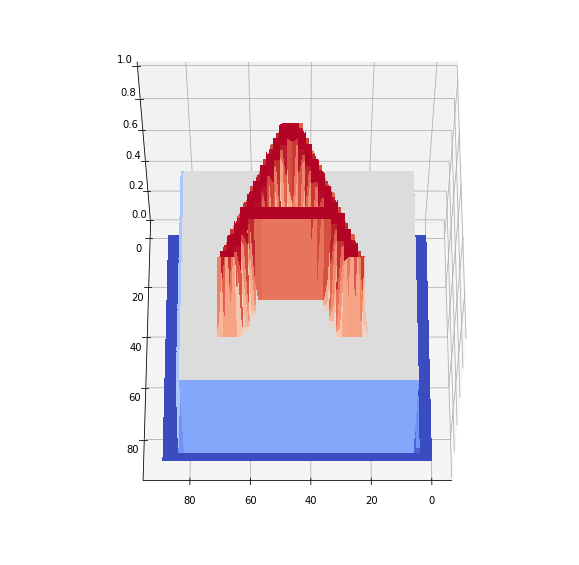

In [37]:
%matplotlib inline
import os
from mpl_toolkits.mplot3d import Axes3D 
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

file = os.path.join('../../resource/image/a_letter.png')
img = io.imread(file)
g_img = color.rgb2gray(img)
shape = g_img.shape

# Make data
X = np.arange(0, shape[0])
Y = np.arange(0, shape[1])
X, Y = np.meshgrid(X, Y)
Z = g_img

# Plot the surface
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.view_init(60, 90)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()

## 1.2 Visual Intensity 

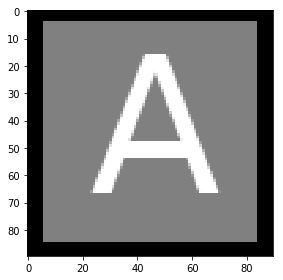

In [43]:
from skimage import io, color
import matplotlib.pyplot as plt

v_image = io.imread('../../resource/image/a_letter.png')
gv_image = color.rgb2gray(v_image)

io.imshow(gv_image)
plt.show()

## 1.3 2-D Numerical array

In [80]:
from skimage import io, color
import numpy as np

n_image = color.rgb2gray(io.imread('../../resource/image/a_letter.png'))

print(n_image[:, :])

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


## <b>2. Relationship between pixels</b>
<br />
<p>
    In this topic we will learn about definitions of any relationship between pixels
</p>
<br />
### Exploring topics
1. Neighborhood
- Adjacency
- Path

## 2.1 Neighborhood
<br>

<b>Neighborhood</b> is the pixels nearby a pixel p. so we can define neighborhood like these...
1. $ N_4(p) $, 4 - neighbors of p
- $ N_D(p) $,  Diagonal - neighbors of p
- $ N_8(p) $,  8 - neighbors of p

## 2.1.1 $ N_4(p) $, 4 - neighbors of p
<br />

<b> Given coordinate if p = (x, y) :</b><br />
<center><h3>(x+1, y), (x-1, y), (x, y+1), (x, y-1)<h3></center>
<br/>
<b>Note</b><br/>
- Each pixels ia a unit distance from p

In [58]:
# Init 16x16 Image
import numpy as np

rn_data = np.random.randint(0, 256, (3, 3))
print(data)


[[174  87  26]
 [ 74  55 143]
 [ 80 124  60]]


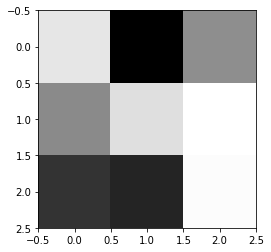

In [60]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(rn_data, cmap=cm.gray)
plt.show()

### 2.1.1a Write a program for finding $ N_4(p) $

In [356]:
import matplotlib.pyplot as plt

def n4(p, shape):
    neighbors_set = set()
    V = list(range(shape[0]))
    exV = [V[0]-1, V[len(V)-1]+1]
    if len(p) == 2:
        x,y = p
        neighbors_set = {
                            (x+1, y),
                            (x-1, y),
                            (x, y+1),
                            (x, y-1)
                        }
        neighbors_set -= {q for q in neighbors_set if (exV[0] in q) or (exV[1] in q)}
    else:
        print('Need exactly only (x, y), 2D list or tuples')
    return neighbors_set
    
p = (1, 2)
print('4-Neighbors of {0} are'.format(p))
print(n4(p, (3, 3)))



4-Neighbors of (1, 2) are
{(1, 1), (0, 2), (2, 2)}


## 2.1.2 $ N_D(p) $, D - neighbors of p
<br />

<b> Given coordinate if p = (x, y) :</b><br />
<center><h3>(x-1, y-1), (x+1, y-1), (x-1, y+1), (x+1, y+1)<h3></center>
<br/>
<b>Note</b><br/>
- Each pixels is a unit distance from p

### 2.1.2a Write a program for finding $ N_D(p) $

In [80]:
# Let's try by yourself

## 2.1.3 $ N_8(p) $, 8 - neighbors of p
<br />
<p>
    it's simple as equaltion below...
</p>
<br />
<center><h3>$ N_8(p) = N_4(p) + N_D(p) $<h3></center>
<br/>

### 2.1.3a Write a program for finding $ N_8(p) $

In [ ]:
# Let's try by yourself

## <b>2.2 Adjacency (ADJ)</b>
<br/>
<p> It is a set of adjacent cooridinate of p if p is a considering pixel (x, y)</p>
<br/>
### type of adjacency
1. 4-adjacency ( $ ADJ_4(p) $ )
- 8-adjacency  ( $ ADJ_8(p) $ )
- m-adjacency  ( $ ADJ_m(p) $ )

<br/>

## 2.2.1  "4 - adjacency"
<br/>
Set <b>V</b> is a subset of intensity value of image depending on its type<br/>
In our case, gray-scale image have intensity value in range of 0 to 255<br/>
so,possible intensity $$ V = \{0,..,255\} $$
<br/>
<br/>
<u>Conditions</u>
1. p and q are pixel with value in V (specific criteria)
- If q is in $ N_4(p) $ then q is 4-adjacency of p ( $ ADJ_4(p) $ )

4-Adjacency set is {(0, 1)}


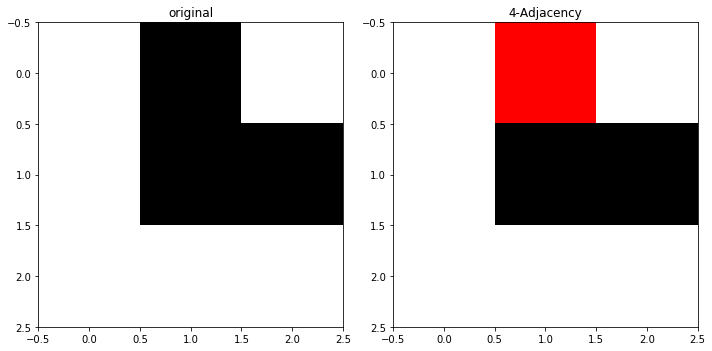

In [303]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt

def adj4(p, img, v):
    nbs = n4(p, img.shape) # nbs = neighbors
    nbs -= { q for q in nbs if img[q] not in v}
    return nbs
c_img = io.imread('../../resource/image/4adj.png')
img_4adj = color.rgb2gray(c_img)

# Test data
p = (0,0) # pixel p
v = {0} # Set V

# Function working here
my4_adj = adj4(p, img_4adj, v)
print('4-Adjacency set is', my4_adj)

# Paint adjacent pixels
for adj in my4_adj:
    c_img[adj] = (255, 0, 0)
    
fig = plt.figure(figsize=(10,10))
subf = fig.add_subplot(121)
subf.set_title('original')
io.imshow(img_4adj)

subf = fig.add_subplot(122)
subf.set_title('4-Adjacency')
io.imshow(c_img)
plt.show()

## 2.2.2  "8 - adjacency"
<br/>
Set <b>V</b> is a subset of intensity value of image depending on its type<br/>
In our case, gray-scale image have intensity value in range of 0 to 255<br/>
so,possible intensity $$ V = \{0,..,255\} $$
<br/>
<br/>
<u>Conditions</u>
1. p and q are pixel with value in V (specific criteria)
- If q is in $ N_8(p) $ then q is 8-adjacency of p ( $ ADJ_8(p) $ )

In [274]:
# Let's Code, show me yours thought 

## 2.2.3  "m - adjacency" ( mixed )
<br/>
Set <b>V</b> is a subset of intensity value of image depending on its type<br/>
In our case, gray-scale image have intensity value in range of 0 to 255<br/>
so,possible intensity $$ V = \{0,..,255\} $$
<br/>
<br/>
<u>Conditions</u>
1. q is in $ N_4 (p) $  ,<b>OR</b>
- q is in $ N_D (p) $ and the set $ N_4(p) \cap N_4(q) $ has no values in V

In [275]:
# Let's Code, show me yours thought 

## 2.3 Path
<br/>
A path from pixel p with coordinate (x, y) to pixel q with coordinate (s, t) is a sequence of distinct pixels with coordinates

<h3>$$ (x_0, y_0), (x_1, y_1),..., (x_n, y_n) $$</h3>

#### where,
1. $ (x_0, y_0) = (x, y) $
- $ (x_n, y_n) = (s, t) $


(0, 1)
(1, 1)
(1, 2)
(2, 2)
(3, 2)
(3, 3)


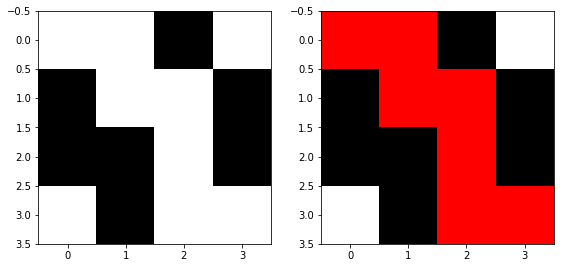

In [359]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt


def find_path(start, dest, img, v):
    visited = {start}
    path = [start]
    step = start
    
    while step != dest:
        adj = adj4(step, img, v)
        adj -= {a for a in adj if a in visited}
        visited = visited.union(adj)
        step = adj.pop()
        path.append(step)
        print(step)
    
    return path
    

cp_img = io.imread('../../resource/image/path.png')
p_img = color.rgb2gray(cp_img)

fig = plt.figure(figsize=(8,8))
fig.add_subplot(121)
io.imshow(p_img)

start = (0, 0)
dest = (3, 3)
v = {1}
my_path = find_path(start, dest, p_img, v)

for path in my_path:
    cp_img[path] = (255, 0, 0)

fig.add_subplot(122)
io.imshow(cp_img)
plt.show()